<div align="center">

# 📌 Project

## 📚 Modelos de Crédito 

### ✍️ Sofía Hernández Zatarain

#### 🎓 Professor: Rodolfo Slay

</div>



### Libraries

In [222]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils.class_weight import compute_class_weight
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Loading and Preprocessing Data

We load the data from the file train.csv and perform an initial exploration with data.info() to get a sense of the dataset's structure, followed by visualizing the distribution of the credit score 

In [223]:
data = pd.read_csv('train.csv')
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


### Search for nulls

In [224]:
data.info()
data.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

### Visualize the Distribution of the Target Variable

Visualize the distribution of the target variable Credit_Score to understand how the classes are distributed 

<Axes: xlabel='Credit_Score', ylabel='count'>

Text(0.5, 1.0, 'Credit Score Distribution')

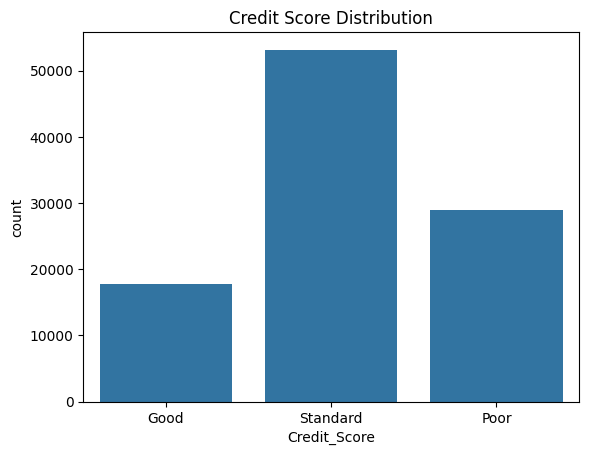

In [225]:
sns.countplot(x=data["Credit_Score"])
plt.title("Credit Score Distribution")
plt.show()

### Transformation and Data Preparation

We preprocess the data by removing irrelevant columns (like IDs and personal information) and define which columns are categorical, ordinal, or numerical for further analysis

In [226]:
data.drop(columns=['ID', 'Customer_ID', 'SSN', 'Name'], inplace=True)

In [227]:
nom = ["Month", "Type_of_Loan"] 
ord = ["Occupation", 'Credit_Mix','Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score']
num = ["Age", 'Annual_Income', 'Monthly_Inhand_Salary','Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 
       "Num_Credit_Inquiries", "Outstanding_Debt",'Credit_Utilization_Ratio', 'Credit_History_Age', "Total_EMI_per_month", 'Amount_invested_monthly','Monthly_Balance']

We grouped the less frequent categories in the Type_of_Loan column into an 'Other' category for easier analysis and modeling as we noticed there were too many different categories under this variable. After analyzing the different plots, we realized this variable, among others do not influence as much in out target variable

<Axes: xlabel='Credit_Score', ylabel='Age'>

Text(0.5, 1.0, 'Average Age by Credit Score')

<Axes: xlabel='Credit_Score', ylabel='Annual_Income'>

Text(0.5, 1.0, 'Average Annual_Income by Credit Score')

<Axes: xlabel='Credit_Score', ylabel='Monthly_Inhand_Salary'>

Text(0.5, 1.0, 'Average Monthly_Inhand_Salary by Credit Score')

<Axes: xlabel='Credit_Score', ylabel='Num_Bank_Accounts'>

Text(0.5, 1.0, 'Average Num_Bank_Accounts by Credit Score')

<Axes: xlabel='Credit_Score', ylabel='Num_Credit_Card'>

Text(0.5, 1.0, 'Average Num_Credit_Card by Credit Score')

<Axes: xlabel='Credit_Score', ylabel='Interest_Rate'>

Text(0.5, 1.0, 'Average Interest_Rate by Credit Score')

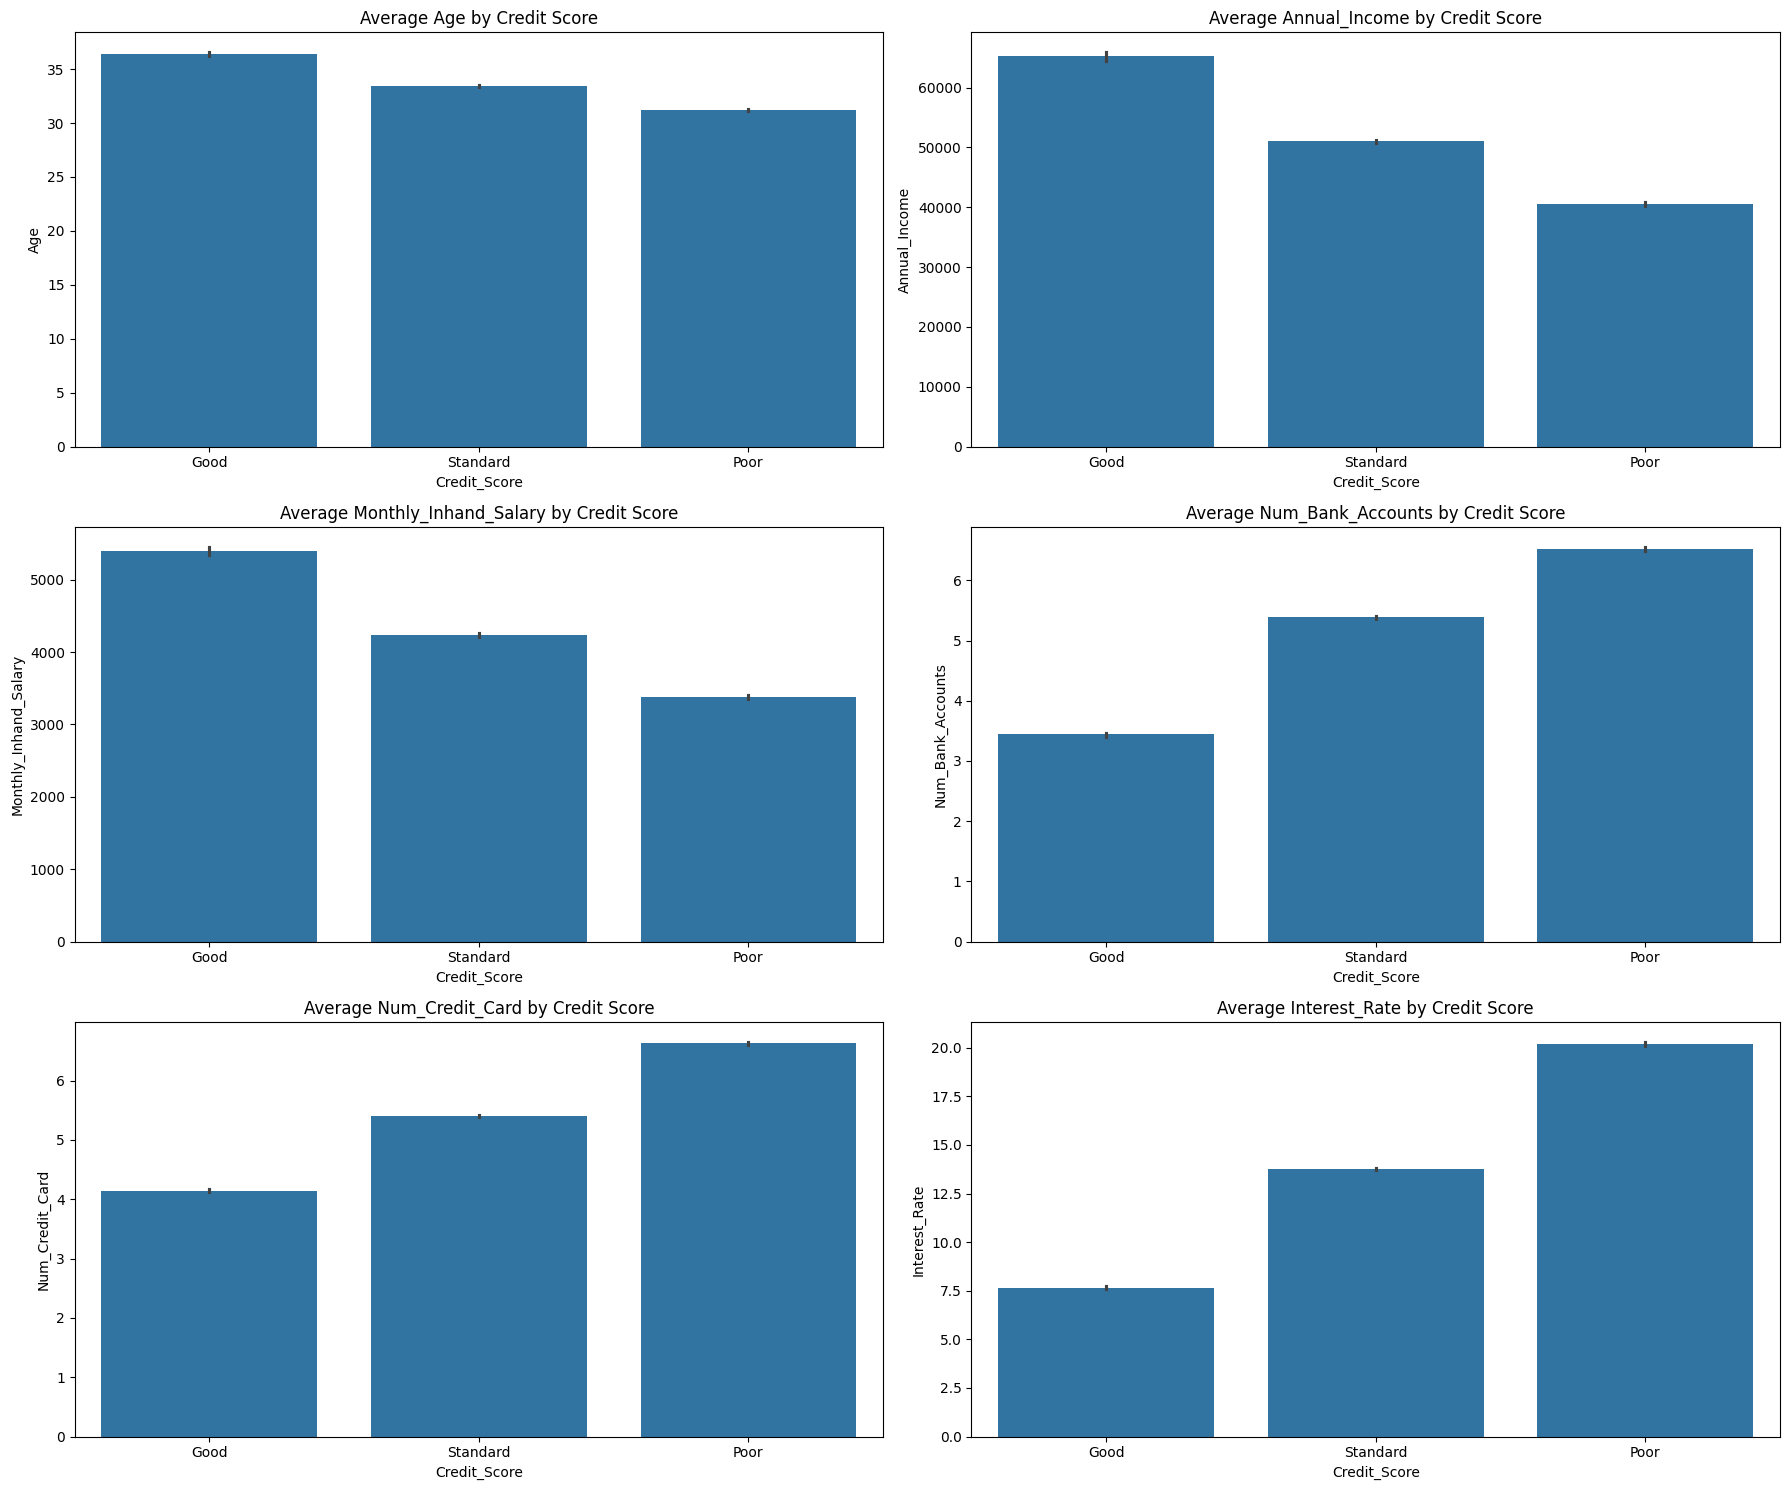

<Axes: xlabel='Credit_Score', ylabel='Num_of_Loan'>

Text(0.5, 1.0, 'Average Num_of_Loan by Credit Score')

<Axes: xlabel='Credit_Score', ylabel='Delay_from_due_date'>

Text(0.5, 1.0, 'Average Delay_from_due_date by Credit Score')

<Axes: xlabel='Credit_Score', ylabel='Num_of_Delayed_Payment'>

Text(0.5, 1.0, 'Average Num_of_Delayed_Payment by Credit Score')

<Axes: xlabel='Credit_Score', ylabel='Changed_Credit_Limit'>

Text(0.5, 1.0, 'Average Changed_Credit_Limit by Credit Score')

<Axes: xlabel='Credit_Score', ylabel='Num_Credit_Inquiries'>

Text(0.5, 1.0, 'Average Num_Credit_Inquiries by Credit Score')

<Axes: xlabel='Credit_Score', ylabel='Outstanding_Debt'>

Text(0.5, 1.0, 'Average Outstanding_Debt by Credit Score')

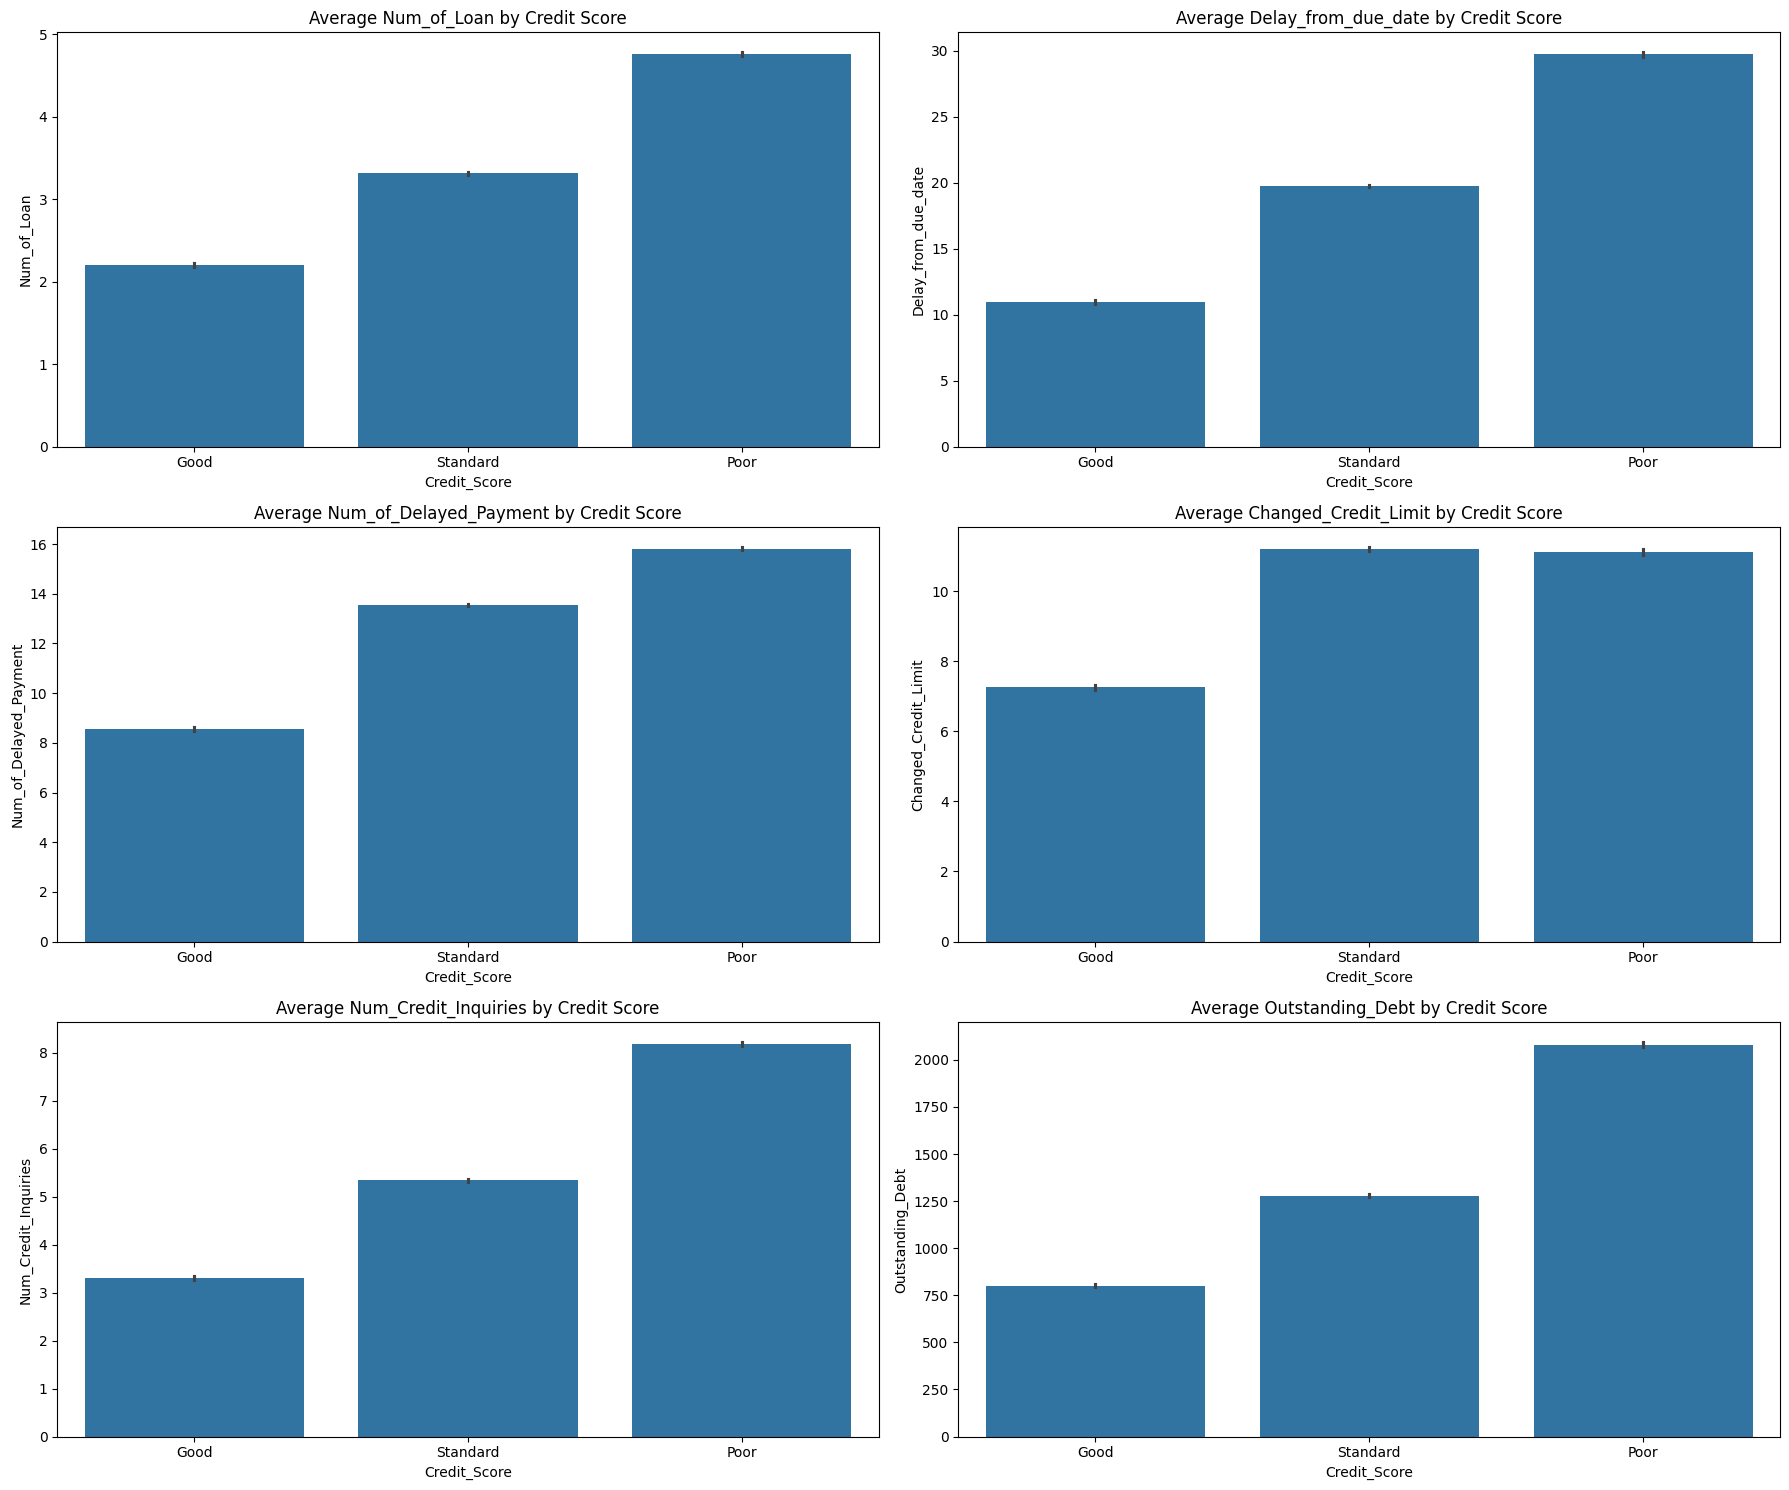

<Axes: xlabel='Credit_Score', ylabel='Credit_Utilization_Ratio'>

Text(0.5, 1.0, 'Average Credit_Utilization_Ratio by Credit Score')

<Axes: xlabel='Credit_Score', ylabel='Credit_History_Age'>

Text(0.5, 1.0, 'Average Credit_History_Age by Credit Score')

<Axes: xlabel='Credit_Score', ylabel='Total_EMI_per_month'>

Text(0.5, 1.0, 'Average Total_EMI_per_month by Credit Score')

<Axes: xlabel='Credit_Score', ylabel='Amount_invested_monthly'>

Text(0.5, 1.0, 'Average Amount_invested_monthly by Credit Score')

<Axes: xlabel='Credit_Score', ylabel='Monthly_Balance'>

Text(0.5, 1.0, 'Average Monthly_Balance by Credit Score')

<Axes: xlabel='Month', ylabel='count'>

Text(0.5, 1.0, 'Month by Credit Score')

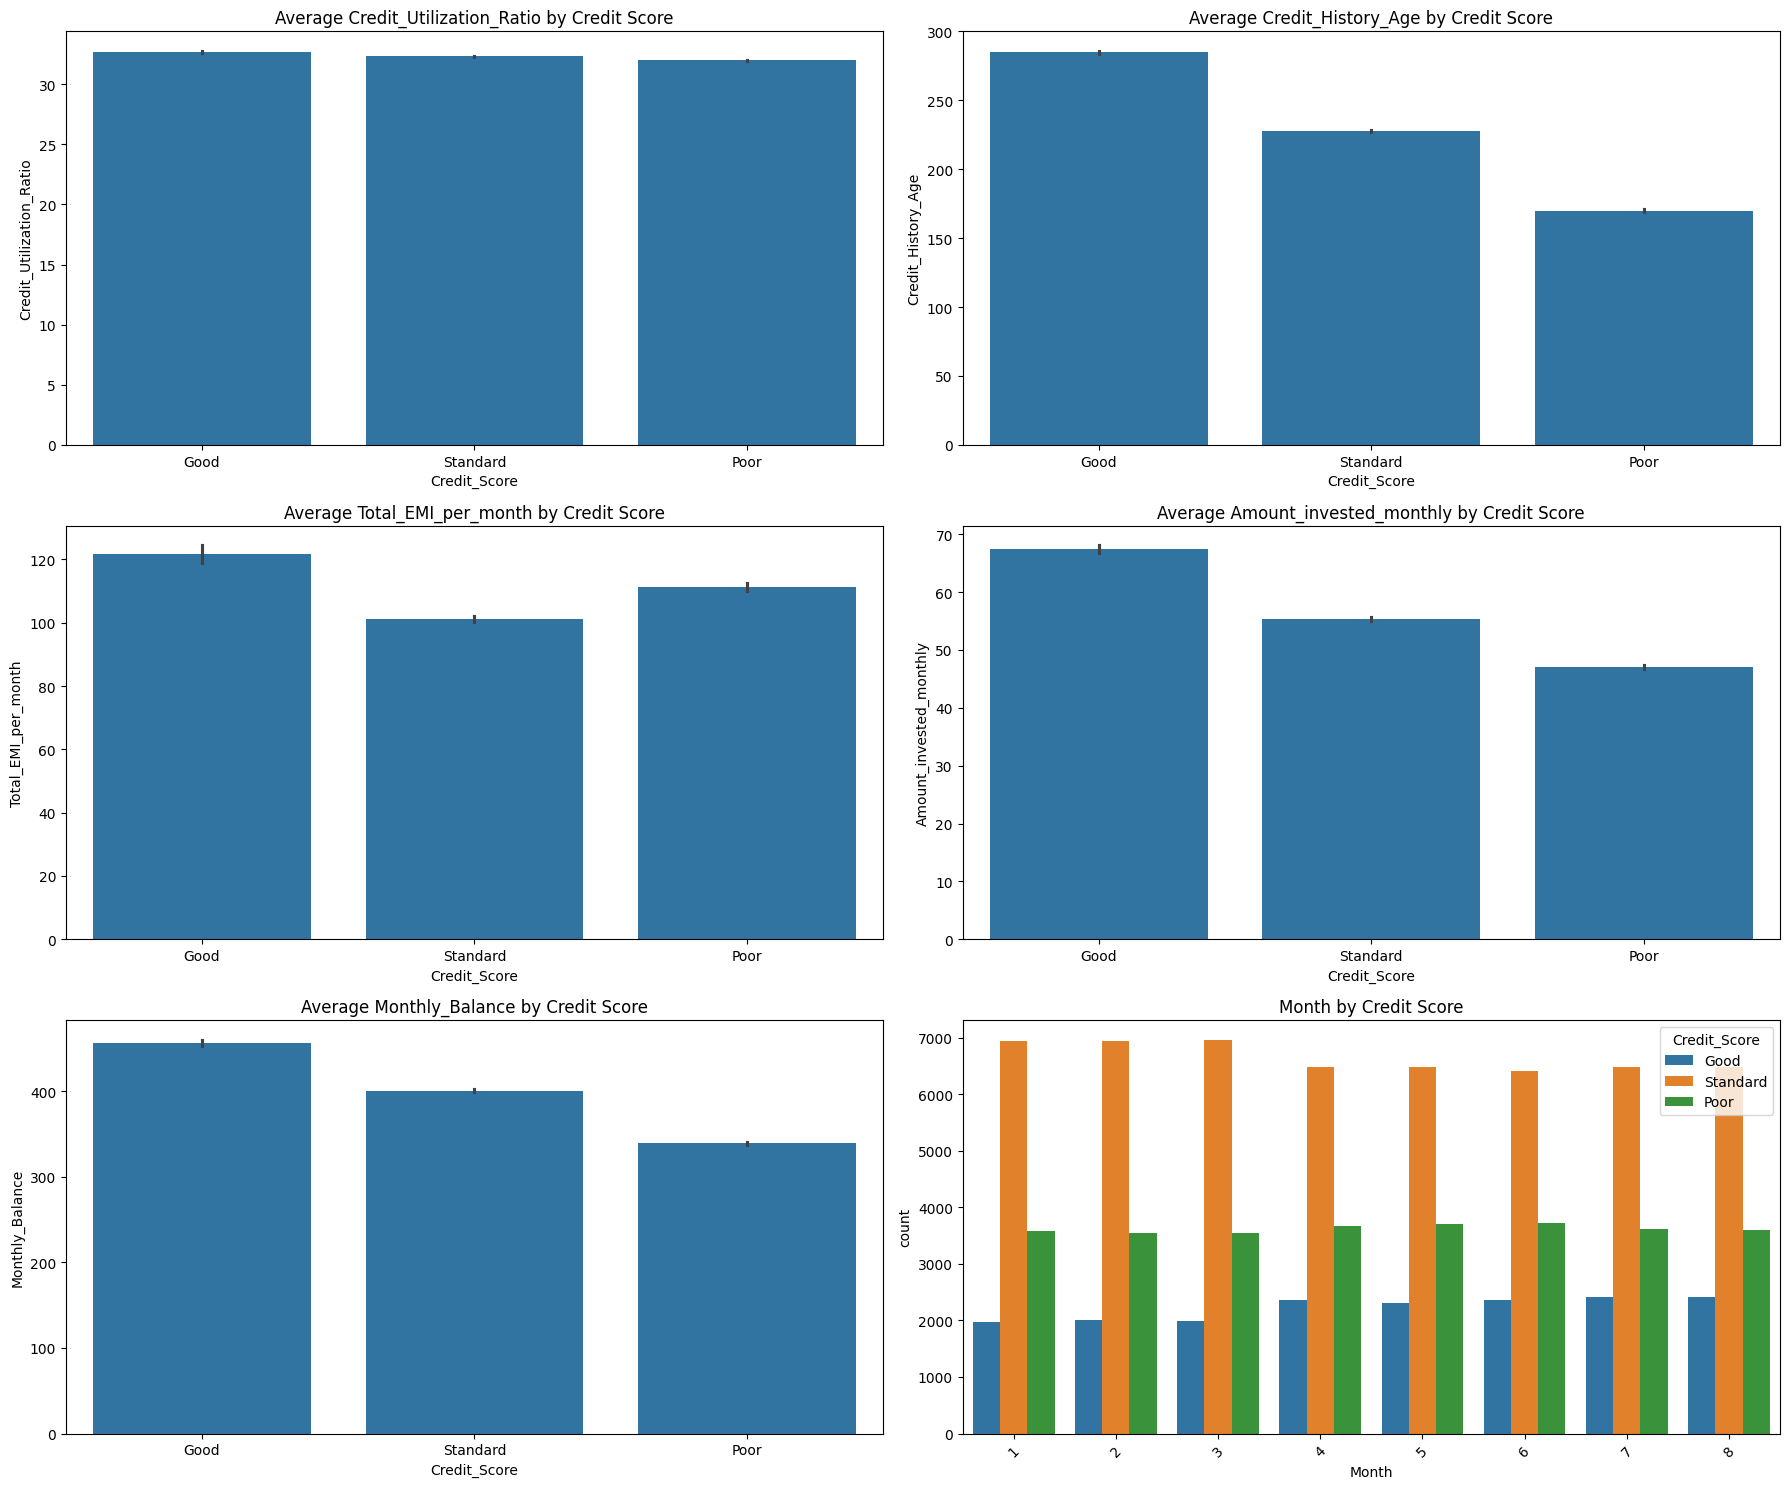

<Axes: xlabel='Type_of_Loan_grouped', ylabel='count'>

Text(0.5, 1.0, 'Type_of_Loan by Credit Score')

<Axes: xlabel='Occupation', ylabel='count'>

Text(0.5, 1.0, 'Occupation by Credit Score')

<Axes: xlabel='Credit_Mix', ylabel='count'>

Text(0.5, 1.0, 'Credit_Mix by Credit Score')

<Axes: xlabel='Payment_of_Min_Amount', ylabel='count'>

Text(0.5, 1.0, 'Payment_of_Min_Amount by Credit Score')

<Axes: xlabel='Payment_Behaviour', ylabel='count'>

Text(0.5, 1.0, 'Payment_Behaviour by Credit Score')

<Axes: xlabel='Credit_Score', ylabel='count'>

Text(0.5, 1.0, 'Credit_Score by Credit Score')

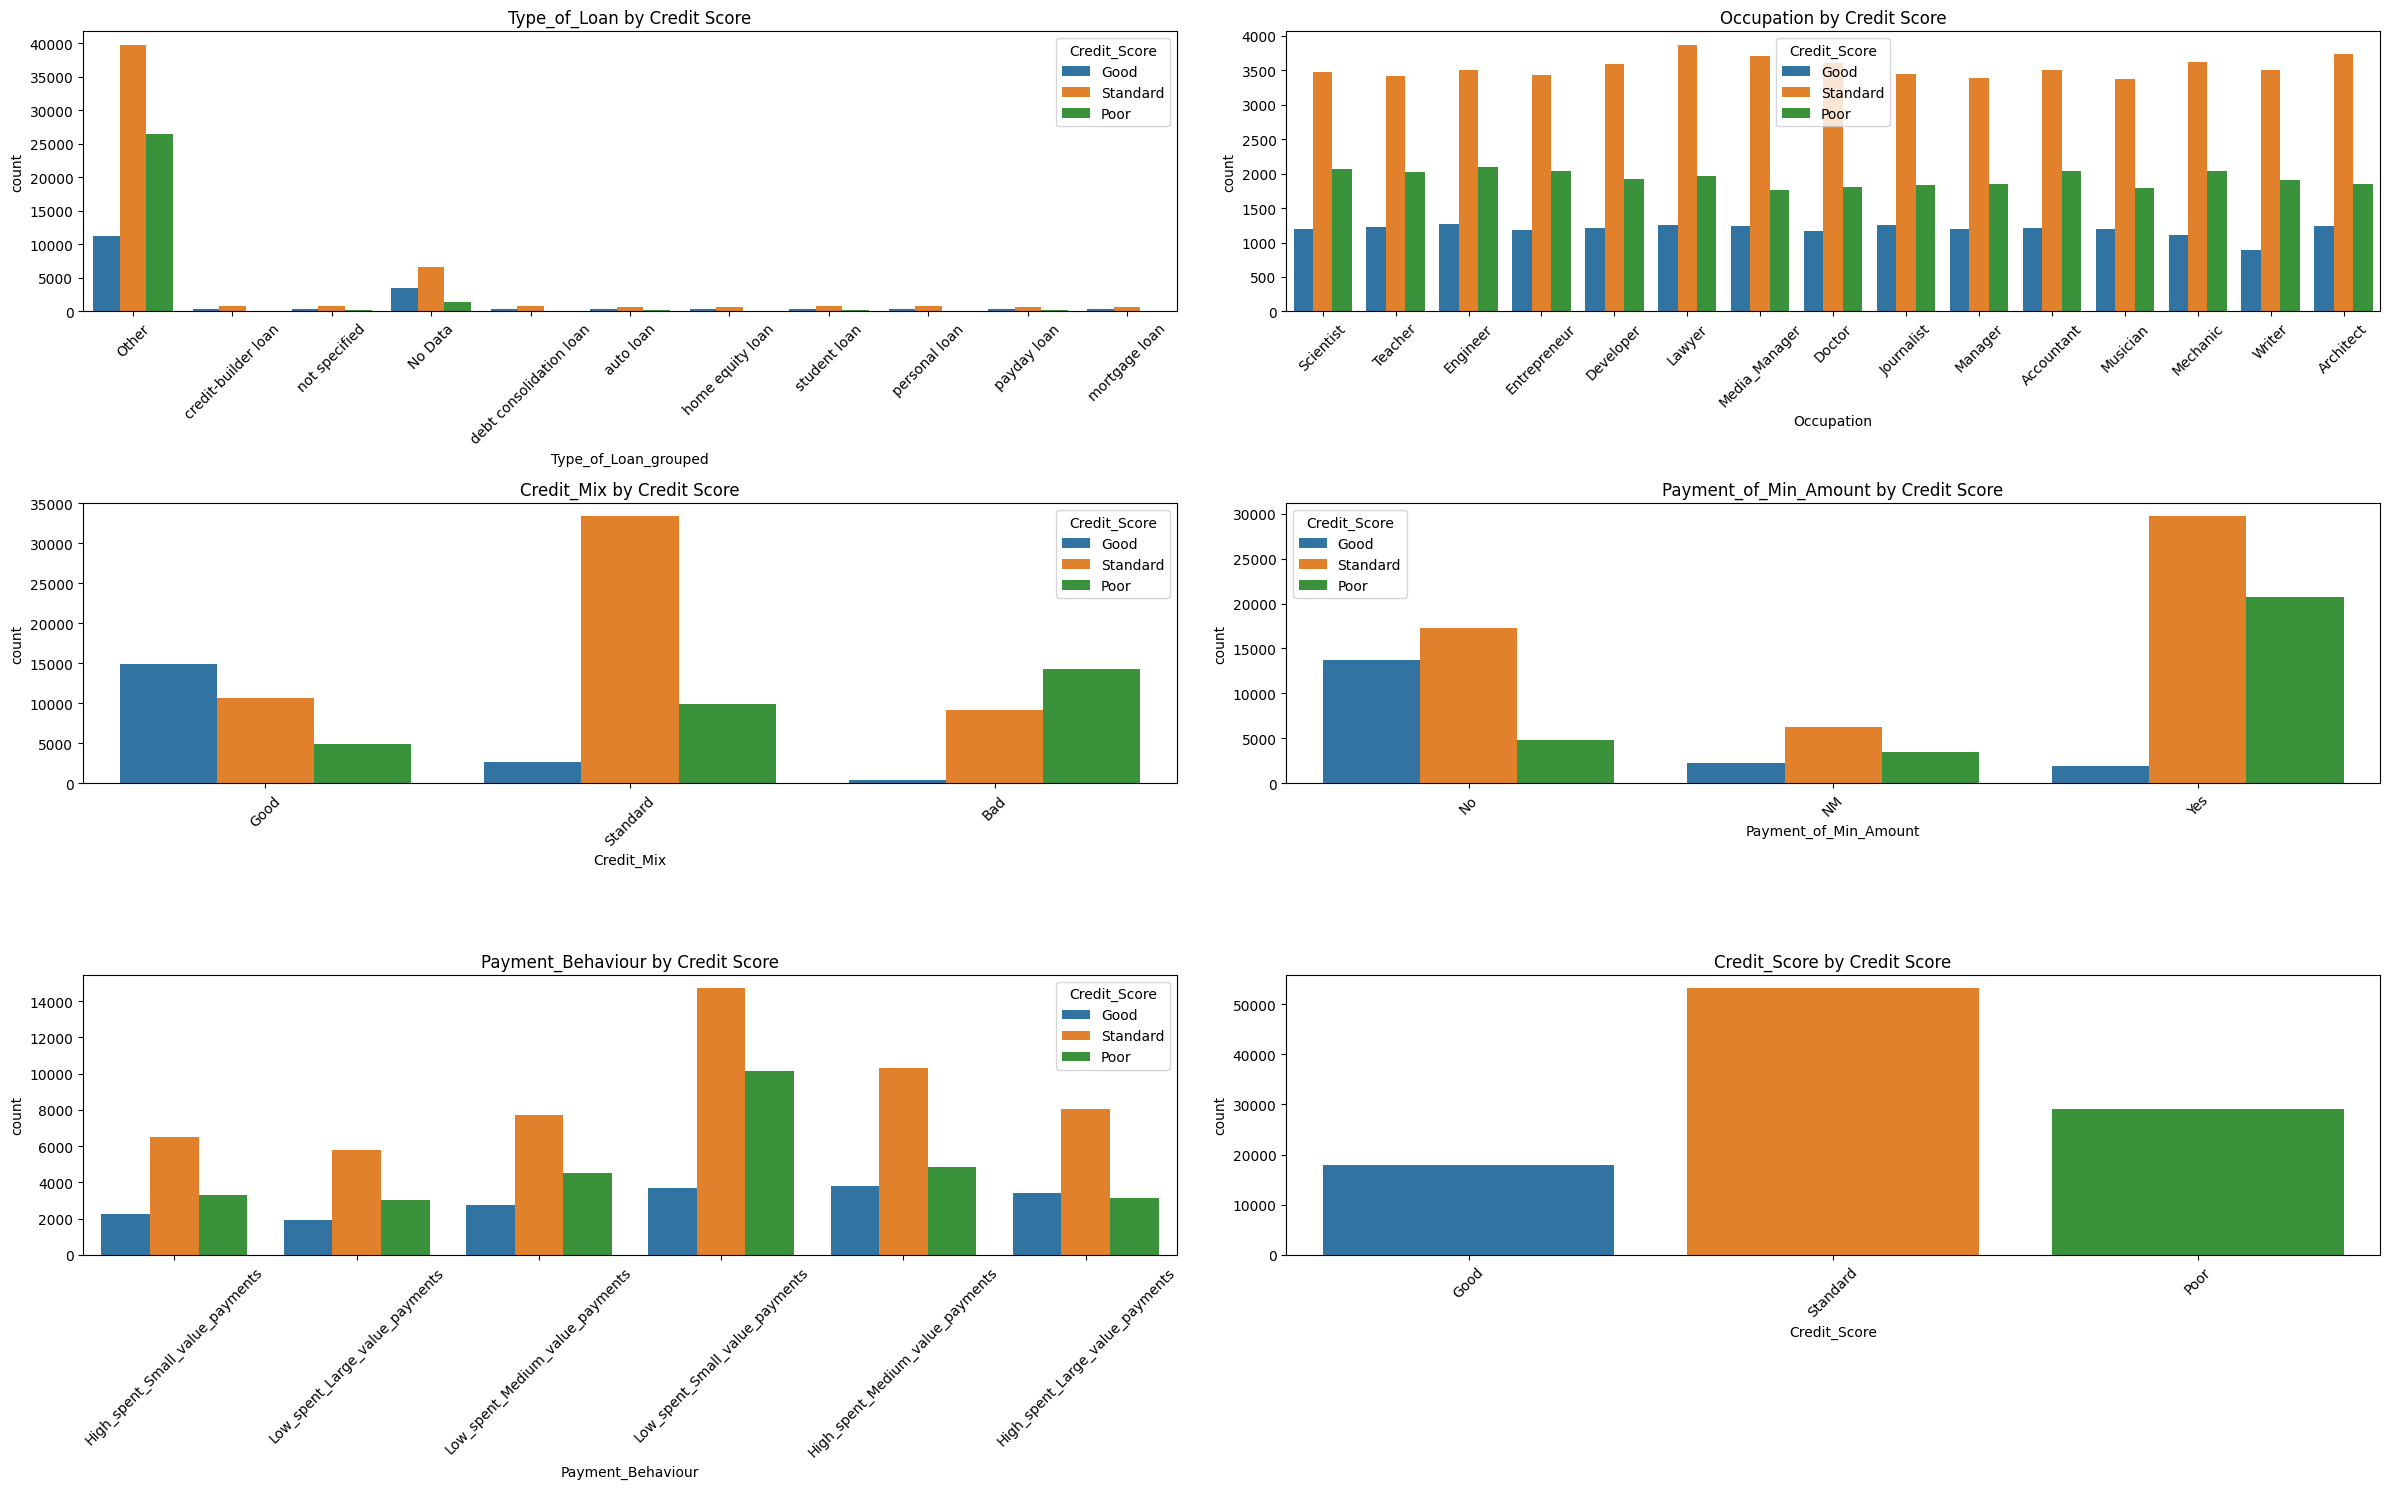

In [228]:
loan_counts = data['Type_of_Loan'].value_counts()
threshold = 500 
common_loans = loan_counts[loan_counts >= threshold].index
data['Type_of_Loan_grouped'] = data['Type_of_Loan'].apply(lambda x: x if x in common_loans else 'Other')

all_vars = num + nom + ord

block_size = 6

for start in range(0, len(all_vars), block_size):
    end = start + block_size
    subset = all_vars[start:end]

    n_cols = 2
    n_rows = (len(subset) // n_cols) + (len(subset) % n_cols > 0)

    wider = any(col == 'Type_of_Loan' for col in subset)
    fig_width = 24 if wider else 18
    fig_height = 5 * n_rows

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(fig_width, fig_height))
    axes = axes.flatten()

    for i, col in enumerate(subset):
        ax = axes[i]

        plot_col = 'Type_of_Loan_grouped' if col == 'Type_of_Loan' else col

        if col in num:
            sns.barplot(x='Credit_Score', y=plot_col, data=data, ax=ax)
            ax.set_title(f'Average {col} by Credit Score')
        else:
            sns.countplot(x=plot_col, hue='Credit_Score', data=data, ax=ax)
            ax.set_title(f'{col} by Credit Score')
            ax.tick_params(axis='x', rotation=45)

    for j in range(len(subset), len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

We decided to drop the following columns as their relation with Credit Score was minimal

In [229]:
data = data.drop(columns = ['Age', 'Changed_Credit_Limit', 'Credit_Utilization_Ratio', 'Total_EMI_per_month', 'Month', 'Type_of_Loan', 'Occupation', 'Payment_Behaviour', 'Type_of_Loan_grouped'])

In [230]:
data.head()

,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Monthly_Balance,Credit_Score
0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,4.0,Good,809.98,265.0,No,21.46538,312.494089,Good
1,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,4.0,4.0,Good,809.98,266.0,No,21.46538,284.629162,Good
2,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,4.0,Good,809.98,267.0,No,21.46538,331.209863,Good
3,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,4.0,Good,809.98,268.0,No,21.46538,223.451310,Good
4,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,4.0,4.0,Good,809.98,269.0,No,21.46538,341.489231,Good


### Feature Selection and Data Preparation

In [231]:
X = data.drop(columns=['Credit_Score'])
y = data['Credit_Score']

### Encode categorical variables

We mapped the categorical variables Credit_Mix and Payment_of_Min_Amount to numeric values for use in machine learning algorithms

In [232]:
credit_mix_map = {'Bad': 0, 'Standard': 1, 'Good': 2}
payment_map = {'No': 0, 'NM': 1, 'Yes': 2}

X['Credit_Mix'] = X['Credit_Mix'].map(credit_mix_map)
X['Payment_of_Min_Amount'] = X['Payment_of_Min_Amount'].map(payment_map)

### Data Splitting

 We split the data into training and test sets, with 80% of the data used for training and 20% for testing. Stratified splitting ensures that the class distribution in both the training and test sets is similar

In [233]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

### Winsorization for outliers

The purpose is to clip outliers in numerical features to ensure that they do not unduly influence the model training

In [235]:
for col in X_train.select_dtypes(include=['float64', 'int64']).columns:
    lower, upper = np.percentile(X_train[col], [1, 99])
    X_train[col] = np.clip(X_train[col], lower, upper)
    X_test[col] = np.clip(X_test[col], lower, upper)

### Data Standarization

We scaled the numerical features using StandardScaler to ensure that they have zero mean and unit variance, which helps models like logistic regression and gradient boosting perform better

In [236]:
scaler = StandardScaler()
X_train[X_train.select_dtypes(include=['float64', 'int64']).columns] = scaler.fit_transform(X_train[X_train.select_dtypes(include=['float64', 'int64']).columns])
X_test[X_test.select_dtypes(include=['float64', 'int64']).columns] = scaler.transform(X_test[X_test.select_dtypes(include=['float64', 'int64']).columns])

### Y Encoding

We converted the target variable Credit_Score into an ordered categorical variable, and then map the categories Poor, Standard, Good to numeric values

In [237]:
order = ['Poor', 'Standard', 'Good']

y_train = pd.Series(pd.Categorical(y_train, categories=order, ordered=True))
y_test = pd.Series(pd.Categorical(y_test, categories=order, ordered=True))

category_mapping = {category: idx for idx, category in enumerate(order)}

In [238]:
y_train = y_train.map(category_mapping)
y_test = y_test.map(category_mapping)

### Data balancing

We computed class weights to handle any class imbalance in the training data, so that the model gives more importance to underrepresented classes

In [241]:
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

### Model Training

In [242]:
log_reg = LogisticRegression(class_weight=class_weight_dict)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_clf = xgb.XGBClassifier(n_estimators=100, random_state=42, scale_pos_weight=class_weights[1] / class_weights[0])

In [243]:
log_reg.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
gb_clf.fit(X_train, y_train)
xgb_clf.fit(X_train, y_train)

LogisticRegression(class_weight={0: np.float64(1.14947483368536),
                                 1: np.float64(0.6268757297225291),
                                 2: np.float64(1.8697704856728836)})

RandomForestClassifier(class_weight='balanced', random_state=42)

GradientBoostingClassifier(random_state=42)

C:\Users\HeSo273\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [15:30:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

### Testing

In [244]:
y_pred_log = log_reg.predict(X_test)
y_pred_rf = rf_clf.predict(X_test)
y_pred_gb = gb_clf.predict(X_test)
y_pred_xgb = xgb_clf.predict(X_test)

In [245]:
acc_log = accuracy_score(y_test, y_pred_log)
acc_rf = accuracy_score(y_test, y_pred_rf)
acc_gb = accuracy_score(y_test, y_pred_gb)
acc_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'Accuracy LogReg: {acc_log:.4f}, RandomForest: {acc_rf:.4f}, GradientBoosting: {acc_gb:.4f}, XGBoost: {acc_xgb:.4f}')

Accuracy LogReg: 0.6442, RandomForest: 0.8162, GradientBoosting: 0.7084, XGBoost: 0.7718


The model with the best performance was Random Forest Classifier

### Calculation of Probability of Default

In [ ]:
y_pred_prob_log = log_reg.predict_proba(X_test)[:, 0] 
y_pred_prob_rf = rf_clf.predict_proba(X_test)[:, 0]   
y_pred_prob_gb = gb_clf.predict_proba(X_test)[:, 0]    
y_pred_prob_xgb = xgb_clf.predict_proba(X_test)[:, 0] 



<Figure size 1000x600 with 0 Axes>

(array([ 861., 2515., 2708., 2289., 1705., 1286.,  896.,  689.,  623.,
         449.,  551.,  541.,  616.,  663.,  779.,  813.,  728.,  688.,
         477.,  123.]),
 array([0.00609522, 0.05428646, 0.1024777 , 0.15066893, 0.19886017,
        0.24705141, 0.29524265, 0.34343388, 0.39162512, 0.43981636,
        0.48800759, 0.53619883, 0.58439007, 0.63258131, 0.68077254,
        0.72896378, 0.77715502, 0.82534625, 0.87353749, 0.92172873,
        0.96991997]),
 <BarContainer object of 20 artists>)

(array([8972., 2174.,  831.,  275.,  303.,  330.,  289.,  246.,  288.,
         345.,  345.,  462.,  317.,  560.,  383.,  536.,  817.,  689.,
        1203.,  635.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

(array([1502., 5603., 2780., 1394.,  714.,  342.,  301.,  248.,  229.,
         465.,  864.,  907.,  444.,  262.,  341.,  394.,  646., 1548.,
         966.,   50.]),
 array([0.00595434, 0.04885543, 0.09175651, 0.1346576 , 0.17755868,
        0.22045977, 0.26336085, 0.30626194, 0.34916302, 0.39206411,
        0.43496519, 0.47786628, 0.52076736, 0.56366845, 0.60656953,
        0.64947062, 0.69237171, 0.73527279, 0.77817388, 0.82107496,
        0.86397605]),
 <BarContainer object of 20 artists>)

(array([5039., 3994., 1673.,  880.,  573.,  466.,  408.,  411.,  387.,
         377.,  445.,  437.,  472.,  584.,  667.,  878., 1082.,  820.,
         348.,   59.]),
 array([4.08648848e-05, 4.82727475e-02, 9.65046287e-02, 1.44736499e-01,
        1.92968383e-01, 2.41200268e-01, 2.89432138e-01, 3.37664038e-01,
        3.85895908e-01, 4.34127778e-01, 4.82359678e-01, 5.30591607e-01,
        5.78823447e-01, 6.27055347e-01, 6.75287247e-01, 7.23519087e-01,
        7.71750987e-01, 8.19982886e-01, 8.68214726e-01, 9.16446626e-01,
        9.64678526e-01]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'Probability of Default Distribution')

Text(0.5, 0, 'Probability of Default')

Text(0, 0.5, 'Frequency')

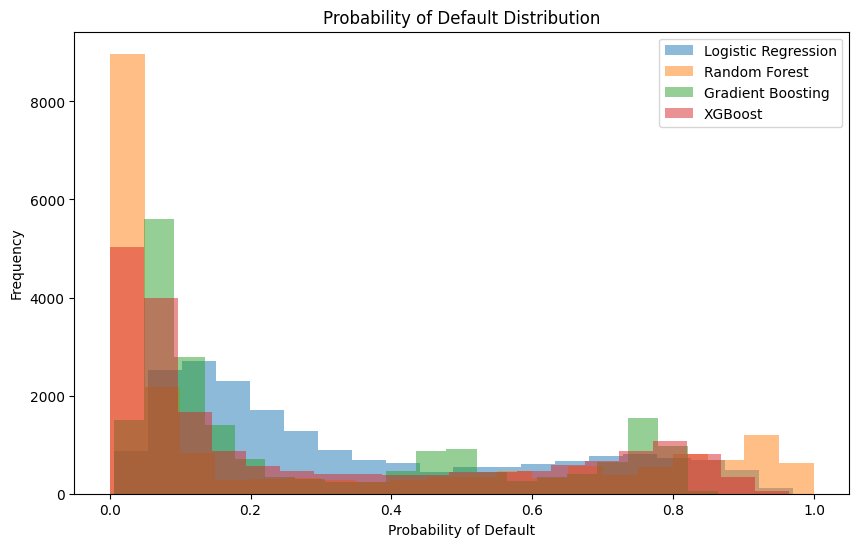

In [255]:
plt.figure(figsize=(10, 6))
plt.hist(y_pred_prob_log, bins=20, alpha=0.5, label='Logistic Regression')
plt.hist(y_pred_prob_rf, bins=20, alpha=0.5, label='Random Forest')
plt.hist(y_pred_prob_gb, bins=20, alpha=0.5, label='Gradient Boosting')
plt.hist(y_pred_prob_xgb, bins=20, alpha=0.5, label='XGBoost')
plt.legend(loc='upper right')
plt.title("Probability of Default Distribution")
plt.xlabel("Probability of Default")
plt.ylabel("Frequency")
plt.show()


### Stacking model to combine all four previous models

We chose Logistic Regression as the meta model because of its simplicity and interpretability

In [246]:
meta_model = LogisticRegression()

In [247]:
stacking_model = StackingClassifier(
    estimators=[('log_reg', log_reg), ('rf', rf_clf), ('gb', gb_clf), ('xgb', xgb_clf)],
    final_estimator=meta_model
)

In [248]:
stacking_model.fit(X_train, y_train)

C:\Users\HeSo273\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [15:31:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\HeSo273\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [15:34:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\HeSo273\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [15:34:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "scale_pos_weight"

StackingClassifier(estimators=[('log_reg',
                                LogisticRegression(class_weight={0: np.float64(1.14947483368536),
                                                                 1: np.float64(0.6268757297225291),
                                                                 2: np.float64(1.8697704856728836)})),
                               ('rf',
                                RandomForestClassifier(class_weight='balanced',
                                                       random_state=42)),
                               ('gb',
                                GradientBoostingClassifier(random_state=42)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              cal...
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None, ...))],
                   final_estimator=LogisticRegression())

### Stacking Model Testing

In [249]:
y_pred_stacking = stacking_model.predict(X_test)

In [250]:
acc_stacking = accuracy_score(y_test, y_pred_stacking)
print(f'Accuracy Stacking Model: {acc_stacking:.4f}')

Accuracy Stacking Model: 0.8166


Even thoguh the Stacking Model improved the accuracy compared to Random Forest Classifier, the improvement was minimal, which leads us to consider if it is actually the best option considering results and resources

### Confusion Matrix

valuate the accuracy of the stacking model

<Axes: >

Text(0.5, 23.52222222222222, 'Predicted')

Text(50.722222222222214, 0.5, 'Actual')

Text(0.5, 1.0, 'Confusion Matrix - Stacking Model')

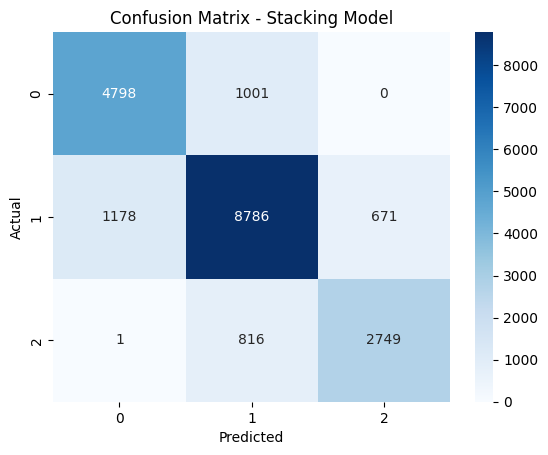

In [251]:
conf_matrix_stacking = confusion_matrix(y_test, y_pred_stacking)
sns.heatmap(conf_matrix_stacking, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Stacking Model')
plt.show()

### Cross Validation

erform cross validation to assess the stability of the stacking model's performance across different training subsets

In [252]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_stacking = cross_val_score(stacking_model, X_train, y_train, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), scoring='accuracy')
print(f'Stacking Cross-validation Accuracy: {cv_scores_stacking.mean():.4f} ± {cv_scores_stacking.std():.4f}')

C:\Users\HeSo273\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [15:36:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\HeSo273\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [15:38:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\HeSo273\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [15:38:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "scale_pos_weight"

Stacking Cross-validation Accuracy: 0.8049 ± 0.0022
